In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.linalg import svd

In [2]:
properties = ['grow','move','roots','fly','swim','leaves','petals']

In [3]:
items ={
    'canary': [1,1,0,1,0,0,0],
    'salmon': [1,1,0,0,1,0,0],
    'oak': [1,0,1,0,0,1,0],
    'rose': [1,0,1,0,0,0,1],
    }

In [4]:
[['plant','animal'],['flower','tree','bird','fish'],['daisy','rose','oak','pine','canary','robin','salmon','sunfish']]

[['plant', 'animal'],
 ['flower', 'tree', 'bird', 'fish'],
 ['daisy', 'rose', 'oak', 'pine', 'canary', 'robin', 'salmon', 'sunfish']]

In [5]:
{
    'plant':['flower','tree'],
    'animal':['bird','fish'],
    'flower':['daisy', 'rose'],
    'tree:':[ 'oak', 'pine' ],
    'bird':['canary', 'robin'],
    'fish':[ 'salmon', 'sunfish']
    
}

{'plant': ['flower', 'tree'],
 'animal': ['bird', 'fish'],
 'flower': ['daisy', 'rose'],
 'tree:': ['oak', 'pine'],
 'bird': ['canary', 'robin'],
 'fish': ['salmon', 'sunfish']}

In [6]:
data = np.array(list(items.values())).T

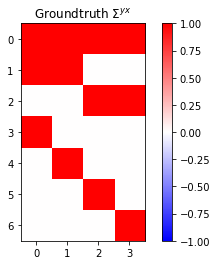

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Generate a random 2D array for demonstration
# data = np.random.rand(10, 10) * 2 - 1  # Values between -1 and 1

# Define the custom colormap
colors = [(0, 'blue'), (0.5, 'white'), (1, 'red')]  # Blue, White, Red
custom_cmap = LinearSegmentedColormap.from_list('custom', colors)

# Plot the heatmap
plt.imshow(data, cmap=custom_cmap, vmin=-1, vmax=1)
plt.colorbar()  # Add a colorbar for reference
plt.title('Groundtruth $\Sigma^{yx}$')
plt.savefig('reproduce_original_groundtruth_sigma.png')
plt.show()


In [8]:
U,S,V = np.linalg.svd(data,full_matrices=False)

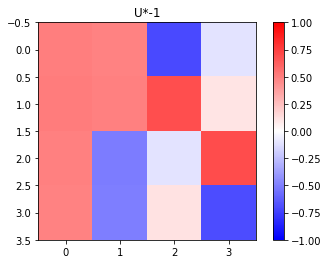

In [116]:

plt.imshow(U*-1, cmap=custom_cmap, vmin=-1, vmax=1)
plt.colorbar()  # Add a colorbar for reference
plt.title('U*-1')
plt.savefig('reproduce_original_groundtruth_U.png')


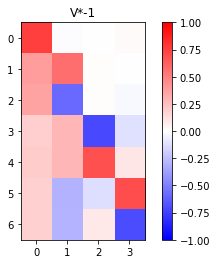

In [119]:
plt.imshow(V.T*-1, cmap=custom_cmap, vmin=-1, vmax=1)
plt.colorbar()  # Add a colorbar for reference
plt.title('V*-1')
plt.savefig('reproduce_original_groundtruth_V.png')


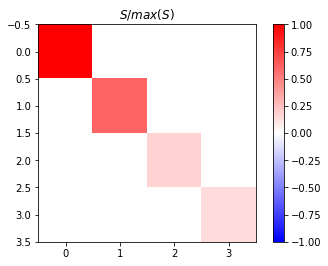

In [127]:

plt.imshow(np.diag(S)/max(S), cmap=custom_cmap, vmin=-1, vmax=1)
plt.colorbar()  # Add a colorbar for reference
plt.title('$S/max(S)$')
plt.savefig('reproduce_original_groundtruth_S.png')


In [12]:
def initializer_(model, gamma=1e-12):
  """
  In-place Re-initialization of weights

  Args:
    model: torch.nn.Module
      PyTorch neural net model
    gamma: float
      Initialization scale

  Returns:
    Nothing
  """
  for weight in model.parameters():
    n_out, n_in = weight.shape
    sigma = gamma / math.sqrt(n_in + n_out)
    nn.init.normal_(weight, mean=0.0, std=sigma)

In [13]:
data.shape[0]

7

In [93]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import initializers

def create_model(input_dim,data):
    # Custom initializer with small norm
    initializer = initializers.RandomNormal(mean=0.0, stddev=5e-2)

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,), name='input_layer'),
        tf.keras.layers.Dense(units=data.shape[0], activation='linear', name='hidden_layer_1', use_bias=False,
                              kernel_initializer=initializer),
        tf.keras.layers.Dense(units=data.shape[0], activation='linear', name='hidden_layer_2', use_bias=False,
                              kernel_initializer=initializer),
    ])
    learning_rate = 1  # Set your desired learning rate
    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model


In [94]:
def get_onehots(input_array):
    indices_of_ones = np.where(input_array == 1)[0]

    # Create one-hot arrays for each index
    one_hot_arrays = [np.eye(len(input_array))[idx] for idx in indices_of_ones]
    return one_hot_arrays

In [95]:
get_onehots(data.T[0])

[array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.])]

In [96]:
data_xs = np.eye(data.shape[1])

In [97]:
data_xs

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [98]:
data_df = pd.DataFrame((zip(data_xs, data.T)), columns=['x','y'])

In [99]:
# data_df['onehots'] = data_df['y'].apply( get_onehots)

In [100]:
# data_df = data_df.explode('onehots')

In [101]:
data_df

,x,y
0,"[1.0, 0.0, 0.0, 0.0]","[1, 1, 0, 1, 0, 0, 0]"
1,"[0.0, 1.0, 0.0, 0.0]","[1, 1, 0, 0, 1, 0, 0]"
2,"[0.0, 0.0, 1.0, 0.0]","[1, 0, 1, 0, 0, 1, 0]"
3,"[0.0, 0.0, 0.0, 1.0]","[1, 0, 1, 0, 0, 0, 1]"


In [102]:
xs = np.array(data_df['x'].tolist())
ys = np.array(data_df['y'].tolist())

In [103]:
input_dim = data_xs.shape[0]

In [104]:
# Train the model
all_runs = []
for run in range(5):
    model=create_model(input_dim, data)
    all_predictions = []
    predictions = model.predict( data_xs)
    all_predictions.append(predictions)
    for i in range(9):
        model.fit(xs,  ys, epochs=1, batch_size=1);
        predictions = model.predict( data_xs)
        all_predictions.append(predictions)
    all_runs.append(all_predictions)

1/1 [==============================] - 0s 53ms/step


/home/amoldwin/.local/lib/python3.9/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


1/1 [==============================] - 0s 10ms/step


In [105]:
np.array(all_predictions).shape

(10, 4, 7)

In [106]:
mean_preds = np.array(all_runs).mean(axis=0)

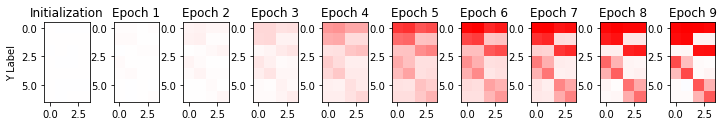

In [128]:
fig, axs = plt.subplots(1, len(mean_preds), figsize=(10, 5))  # Adjust figsize as needed

for i, predictions in enumerate(mean_preds):
    axs[i].imshow(predictions.T, cmap=custom_cmap, vmin=-1, vmax=1)
    if i == 0:
        axs[i].set_title("Initialization")  # Set title for the first subplot
        axs[i].set_ylabel("Y Label")  # Set ylabel for the first subplot
        # plt.colorbar(ax=axs[i], orientation='vertical', label="Colorbar Label")  # Add colorbar to the first subplot
    else:
        axs[i].set_title("Epoch {}".format(i))  # Set title for other subplots

plt.tight_layout()  # Adjust spacing between subplots
plt.savefig('reproduce_original_epochs_sigma.png')

plt.show()

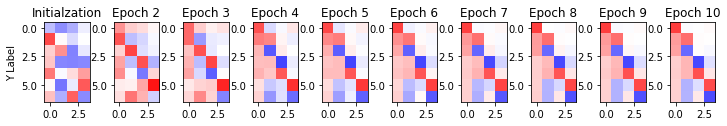

In [129]:
fig, axs = plt.subplots(1, len(mean_preds), figsize=(10, 5))  # Adjust figsize as needed

for i, predictions in enumerate(mean_preds):
    U,S,V = np.linalg.svd(predictions,full_matrices=False)
    axs[i].imshow(V.T*-1, cmap=custom_cmap, vmin=-1, vmax=1)
    if i == 0:
        axs[i].set_title("Initialzation")  # Set title for the first subplot
        axs[i].set_ylabel("Y Label")  # Set ylabel for the first subplot
        # plt.colorbar(ax=axs[i], orientation='vertical', label="Colorbar Label")  # Add colorbar to the first subplot
    else:
        axs[i].set_title("Epoch {}".format(i+1))  # Set title for other subplots

plt.tight_layout()  # Adjust spacing between subplots
# im = axs[i].imshow(predictions.T, cmap=custom_cmap, vmin=-1, vmax=1)

# plt.colorbar(im,ax=axs[i], orientation='vertical', label="Colorbar Label") 
plt.savefig('reproduce_original_epochs_V.png')

plt.show()

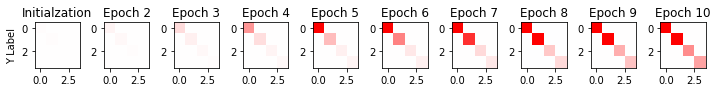

In [130]:
fig, axs = plt.subplots(1, len(mean_preds), figsize=(10, 5))  # Adjust figsize as needed
alphas = []
for i, predictions in enumerate(mean_preds):
    U,S,V = np.linalg.svd(predictions,full_matrices=False)
    alphas.append(S)
    axs[i].imshow(np.eye(4)*S, cmap=custom_cmap, vmin=-1, vmax=1)
    if i == 0:
        axs[i].set_title("Initialzation")  # Set title for the first subplot
        axs[i].set_ylabel("Y Label")  # Set ylabel for the first subplot
        # plt.colorbar(ax=axs[i], orientation='vertical', label="Colorbar Label")  # Add colorbar to the first subplot
    else:
        axs[i].set_title("Epoch {}".format(i+1))  # Set title for other subplots

plt.tight_layout()  # Adjust spacing between subplots
# im = axs[i].imshow(predictions.T, cmap=custom_cmap, vmin=-1, vmax=1)
plt.savefig('reproduce_original_epochs_S.png')

# plt.colorbar(im,ax=axs[i], orientation='vertical', label="Colorbar Label") 
plt.show()

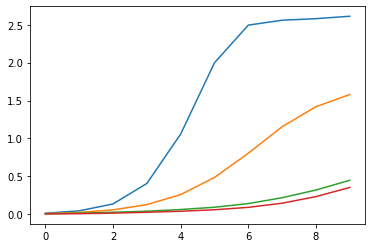

In [131]:
for i in range(len(alphas[0])):
    plt.plot(np.array(alphas)[:,i])
plt.savefig('reproduce_original_alpha_trajectories.png')


In [422]:
#why is SVD different
#effect of bias
#effect of learning rule
#effect of dimensionality
#effect of lr

In [423]:
U

array([[-0.5084667 ,  0.5025238 , -0.02896492,  0.6986362 ],
       [-0.49513555,  0.49324703,  0.06101957, -0.71261823],
       [-0.49928352, -0.48072165, -0.71928716, -0.04741966],
       [-0.49700943, -0.5225743 ,  0.69142145,  0.04282663]],
      dtype=float32)